<a href="https://colab.research.google.com/github/ananyark23/LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
#load the dataset
data = pd.read_csv("/content/drive/MyDrive/Google_Stock_Price_Train.csv")

In [ ]:
print(data.head())
print(data.shape)

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
(1258, 6)


In [ ]:
# convert 'Date' column to datetime objects
data['Date']=pd.to_datetime(data['Date'])

#extract featues from datetime
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [ ]:
print(data['Date'])
print(data['day'])

0      2012-01-03
1      2012-01-04
2      2012-01-05
3      2012-01-06
4      2012-01-09
          ...    
1253   2016-12-23
1254   2016-12-27
1255   2016-12-28
1256   2016-12-29
1257   2016-12-30
Name: Date, Length: 1258, dtype: datetime64[ns]
0        3
1        4
2        5
3        6
4        9
        ..
1253    23
1254    27
1255    28
1256    29
1257    30
Name: day, Length: 1258, dtype: int32


In [ ]:
features = ['year','month','day']
X = data[features]
y = data['Open']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1,1))

In [ ]:
#create the sequences for RNN
timesteps = 50
X_sequences = []
y_sequences = []
for i in range(timesteps, len(X_scaled)):
    X_sequences.append(X_scaled[i-timesteps:i])#50-50:50 = 0:49. we get 0 to 49 values
    y_sequences.append(y_scaled[i])

X_sequences,y_sequences = np.array(X_sequences), np.array(y_sequences)

#ensure the target serquence have the same lenght as the input sequence
#y_sequence=y_sequence[:len(X_sequence)]
#split the data
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=0)

In [ ]:
from keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,activation="tanh",input_shape=(timesteps,3)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
model.fit(X_train,y_train,epochs=10,batch_size=10,verbose=1)

Epoch 1/10
97/97 [==============================] - 7s 27ms/step - loss: 0.0229 - mse: 0.0229
Epoch 2/10
97/97 [==============================] - 3s 29ms/step - loss: 0.0113 - mse: 0.0113
Epoch 3/10
97/97 [==============================] - 2s 23ms/step - loss: 0.0098 - mse: 0.0098
Epoch 4/10
97/97 [==============================] - 2s 20ms/step - loss: 0.0096 - mse: 0.0096
Epoch 5/10
97/97 [==============================] - 3s 27ms/step - loss: 0.0093 - mse: 0.0093
Epoch 6/10
97/97 [==============================] - 3s 30ms/step - loss: 0.0094 - mse: 0.0094
Epoch 7/10
97/97 [==============================] - 2s 19ms/step - loss: 0.0095 - mse: 0.0095
Epoch 8/10
97/97 [==============================] - 2s 19ms/step - loss: 0.0087 - mse: 0.0087
Epoch 9/10
97/97 [==============================] - 2s 19ms/step - loss: 0.0086 - mse: 0.0086
Epoch 10/10
97/97 [==============================] - 2s 19ms/step - loss: 0.0087 - mse: 0.0087


In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_true = scaler.inverse_transform(y_test)

8/8 [==============================] - 1s 9ms/step


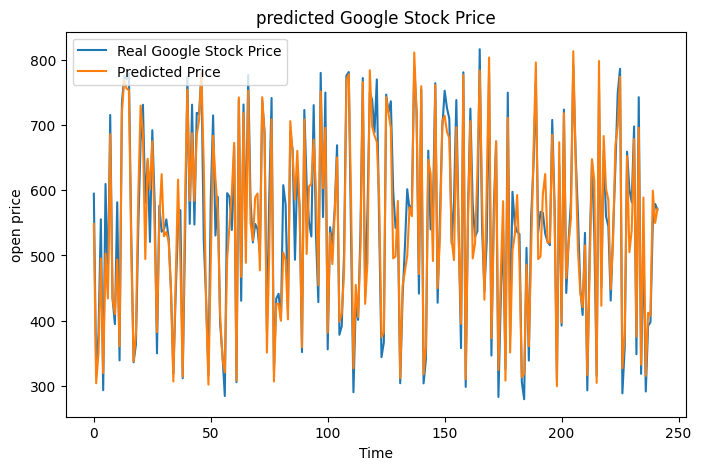

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_test_true,label = 'Real Google Stock Price')
plt.plot(y_pred,label = 'Predicted Price')
plt.title('predicted Google Stock Price')
plt.xlabel('Time')
plt.ylabel('open price')
plt.legend()

stackedLSTM


In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation="tanh" ,input_shape=(timesteps,3), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation="tanh" , return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation="tanh" ))
model.add(Dropout(0.2))


model.add(Dense(1,activation = 'linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

#training the model
model.fit(X_train, y_train, epochs=10, batch_size=10,verbose=1)

Epoch 1/10
97/97 [==============================] - 14s 63ms/step - loss: 0.0228 - mse: 0.0228
Epoch 2/10
97/97 [==============================] - 8s 79ms/step - loss: 0.0119 - mse: 0.0119
Epoch 3/10
97/97 [==============================] - 6s 62ms/step - loss: 0.0110 - mse: 0.0110
Epoch 4/10
97/97 [==============================] - 8s 82ms/step - loss: 0.0097 - mse: 0.0097
Epoch 5/10
97/97 [==============================] - 6s 62ms/step - loss: 0.0107 - mse: 0.0107
Epoch 6/10
97/97 [==============================] - 8s 81ms/step - loss: 0.0101 - mse: 0.0101
Epoch 7/10
97/97 [==============================] - 7s 68ms/step - loss: 0.0095 - mse: 0.0095
Epoch 8/10
97/97 [==============================] - 8s 78ms/step - loss: 0.0093 - mse: 0.0093
Epoch 9/10
97/97 [==============================] - 6s 63ms/step - loss: 0.0089 - mse: 0.0089
Epoch 10/10
97/97 [==============================] - 7s 70ms/step - loss: 0.0093 - mse: 0.0093


In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_true = scaler.inverse_transform(y_test)

8/8 [==============================] - 1s 23ms/step


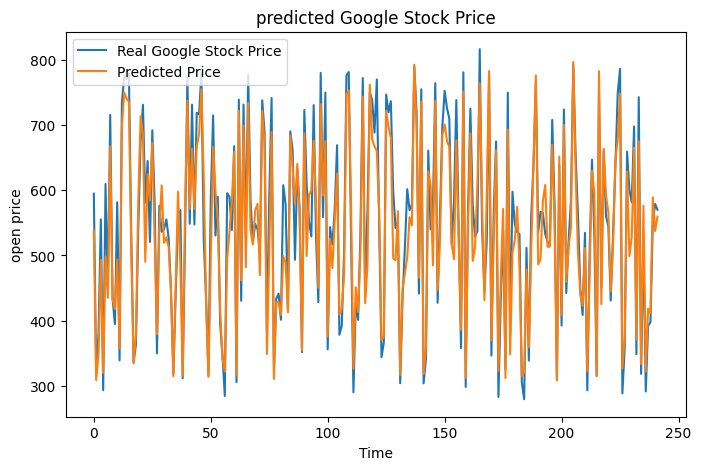

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_test_true,label = 'Real Google Stock Price')
plt.plot(y_pred,label = 'Predicted Price')
plt.title('predicted Google Stock Price')
plt.xlabel('Time')
plt.ylabel('open price')
plt.legend()

bidirectional LSTM

In [ ]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(units=50, activation="tanh" ,input_shape=(timesteps,3), return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, activation="tanh" , return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, activation="tanh" )))
model.add(Dropout(0.2))


model.add(Dense(1,activation = 'linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

#training the model
model.fit(X_train, y_train, epochs=10, batch_size=10,verbose=1)

Epoch 1/10
97/97 [==============================] - 31s 156ms/step - loss: 0.0176 - mse: 0.0176
Epoch 2/10
97/97 [==============================] - 13s 130ms/step - loss: 0.0099 - mse: 0.0099
Epoch 3/10
97/97 [==============================] - 12s 123ms/step - loss: 0.0086 - mse: 0.0086
Epoch 4/10
97/97 [==============================] - 13s 134ms/step - loss: 0.0096 - mse: 0.0096
Epoch 5/10
97/97 [==============================] - 15s 152ms/step - loss: 0.0084 - mse: 0.0084
Epoch 6/10
97/97 [==============================] - 10s 101ms/step - loss: 0.0093 - mse: 0.0093
Epoch 7/10
97/97 [==============================] - 12s 121ms/step - loss: 0.0108 - mse: 0.0108
Epoch 8/10
97/97 [==============================] - 12s 121ms/step - loss: 0.0082 - mse: 0.0082
Epoch 9/10
97/97 [==============================] - 12s 121ms/step - loss: 0.0081 - mse: 0.0081
Epoch 10/10
97/97 [==============================] - 10s 106ms/step - loss: 0.0085 - mse: 0.0085


8/8 [==============================] - 3s 104ms/step


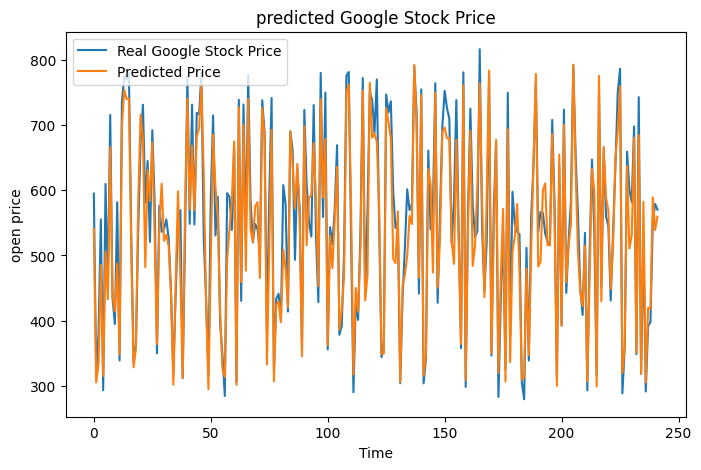

In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_true = scaler.inverse_transform(y_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_test_true,label = 'Real Google Stock Price')
plt.plot(y_pred,label = 'Predicted Price')
plt.title('predicted Google Stock Price')
plt.xlabel('Time')
plt.ylabel('open price')
plt.legend()